### 1. Import and data loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

In [2]:
df = pd.read_csv("../data/chess_games_feature.csv")
df.head()

,WhiteElo,BlackElo,ResultNumeric,EventTypeID,RatingDiff,AvgRating,WhiteIsHigherRated,ECOID
0,2504,2371,1.0,0,133,2437.5,1,0
1,2487,2596,0.5,0,109,2541.5,0,0
2,2915,2921,0.5,0,6,2918.0,0,0
3,2542,2433,1.0,0,109,2487.5,1,10
4,2473,2658,0.0,0,185,2565.5,0,0


### 2. Prepare data

In [3]:
X = df.drop("ResultNumeric", axis=1)
y = df["ResultNumeric"]

# 0 = Black Win, 1 = Draw, 2 = White Win
y = y.map({0.0: 0, 0.5: 1, 1.0: 2})

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

Features: (3266132, 7)
Target: (3266132,)


### 3. Train test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,  # 20% for testing
    random_state=42,
    stratify=y,
)

### 4. Train model

In [5]:
dt_model = DecisionTreeClassifier(
    max_depth=20,  # Same as Random Forest for fair comparison
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
)

In [6]:
start_time = time.time()

dt_model.fit(X_train, y_train)

training_time = time.time() - start_time
print(
    f"Training completed in {training_time:.2f} seconds ({training_time / 60:.2f} minutes)"
)

Training completed in 15.81 seconds (0.26 minutes)


### 5. Evaluate

In [7]:
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f} ({accuracy * 100:.2f}%)\n")

print("Classification Report: \n")
print(
    classification_report(
        y_test, y_pred, target_names=["Black Win", "Draw", "White Win"]
    )
)

Accuracy: 0.5732 (57.32%)

Classification Report: 

              precision    recall  f1-score   support

   Black Win       0.55      0.57      0.56    267660
        Draw       0.80      0.26      0.40     84135
   White Win       0.58      0.66      0.62    301432

    accuracy                           0.57    653227
   macro avg       0.64      0.50      0.52    653227
weighted avg       0.59      0.57      0.56    653227



### 6. Confusion Matrix

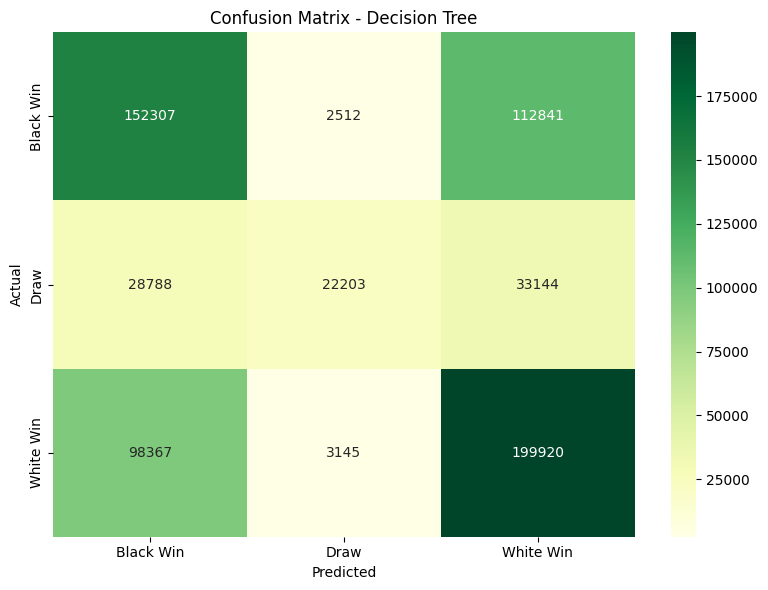

In [8]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="YlGn",
    xticklabels=["Black Win", "Draw", "White Win"],
    yticklabels=["Black Win", "Draw", "White Win"],
)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix - Decision Tree")
plt.tight_layout()
plt.show()

### 7. Feature Importance


Feature Importance:
              Feature  Importance
4           AvgRating    0.360687
5  WhiteIsHigherRated    0.293922
3          RatingDiff    0.182065
1            BlackElo    0.060673
0            WhiteElo    0.040335
6               ECOID    0.033968
2         EventTypeID    0.028349


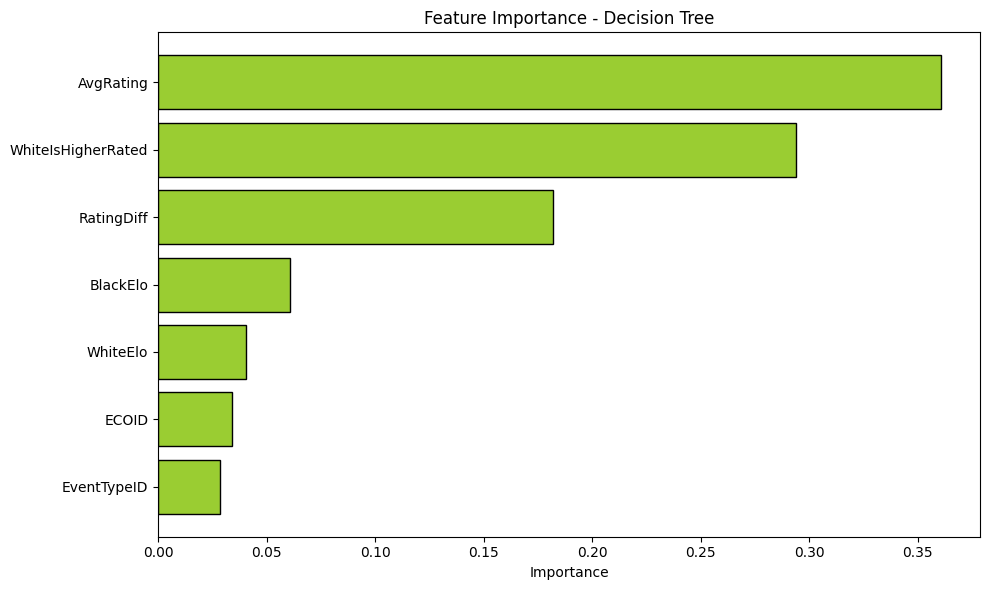

In [9]:
importance_df = pd.DataFrame(
    {"Feature": X.columns, "Importance": dt_model.feature_importances_}
).sort_values("Importance", ascending=False)

print("\nFeature Importance:")
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(
    importance_df["Feature"],
    importance_df["Importance"],
    color="yellowgreen",
    edgecolor="black",
)
plt.xlabel("Importance")
plt.title("Feature Importance - Decision Tree")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()